In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v6.2.1_zinc_supplementation/ciff_sam/2022_02_24_16_27_32/count_data/'

In [3]:
figname = 'model_6.2.1'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [9]:
ddpt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
ddpt

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,preventative_zinc,therapeutic_zinc,wasting_state,age
0,0,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,covered,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.480493,uncovered,covered,susceptible_to_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,uncovered,susceptible_to_child_wasting,early_neonatal
3,3,female,2022,diarrheal_diseases,state_person_time,29,baseline,2.258727,uncovered,uncovered,susceptible_to_child_wasting,early_neonatal
4,4,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,covered,mild_child_wasting,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...
115195,115195,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,148.908966,uncovered,uncovered,moderate_acute_malnutrition,2_to_4
115196,115196,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,222.966461,covered,covered,severe_acute_malnutrition,2_to_4
115197,115197,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,0.000000,uncovered,covered,severe_acute_malnutrition,2_to_4
115198,115198,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,0.000000,covered,uncovered,severe_acute_malnutrition,2_to_4


# first check coverage of each intervention

In [14]:
cp = ddpt.groupby(['input_draw','scenario','year','preventative_zinc']).sum()
ctot = cp.groupby(['input_draw','scenario','year']).sum()
cpzinc = (cp/ctot).groupby(['scenario','year','preventative_zinc']).describe(percentiles=[0.025,0.975])[['value']]
cpzinc.head()

value                                    
                                count mean  std  min 2.5%  50% 97.5%  max
scenario year preventative_zinc                                          
baseline 2022 covered            12.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
              uncovered          12.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0
         2023 covered            12.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
              uncovered          12.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0
         2024 covered            12.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0

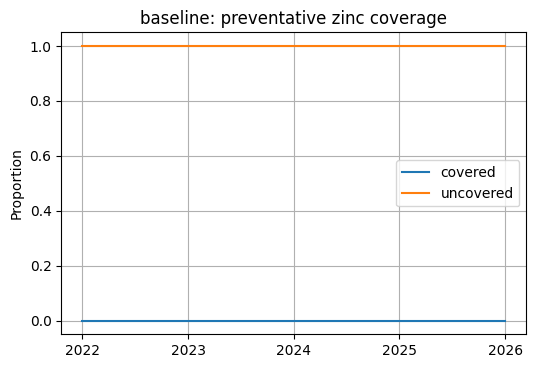

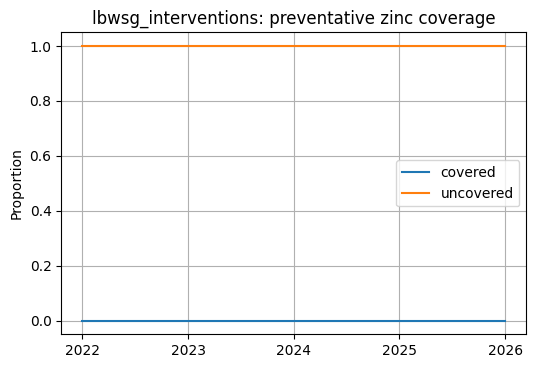

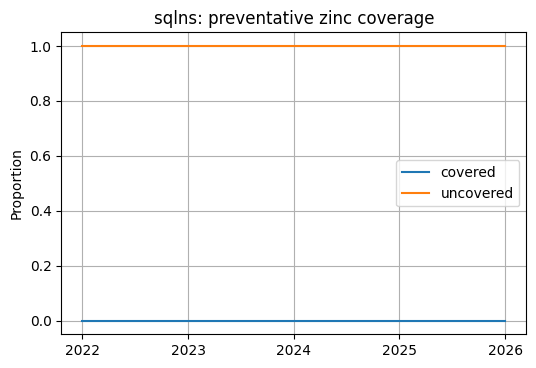

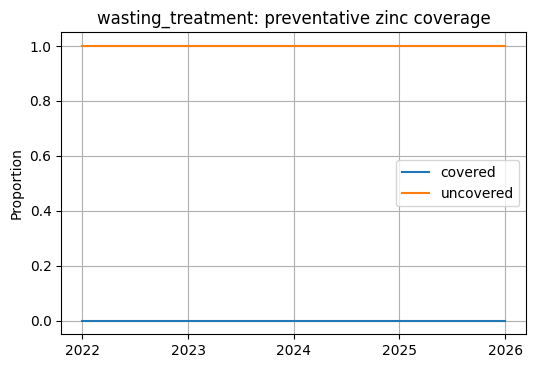

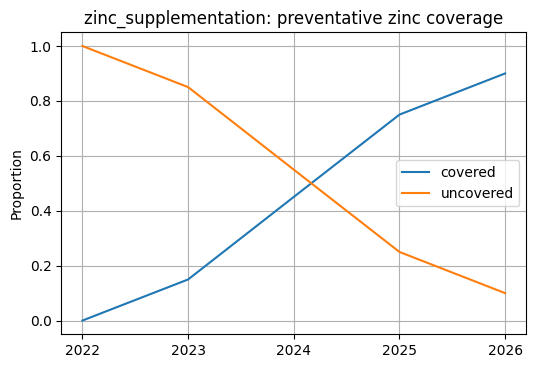

In [18]:
for scenario in cpzinc.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cpzinc.reset_index().preventative_zinc.unique():
        p = cpzinc.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.preventative_zinc==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    #plt.ylim(0,1)
    plt.title(f'{scenario}: preventative zinc coverage')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# looks good!

In [19]:
ct = ddpt.groupby(['input_draw','scenario','year','therapeutic_zinc']).sum()
ctot = ct.groupby(['input_draw','scenario','year']).sum()
ctzinc = (ct/ctot).groupby(['scenario','year','therapeutic_zinc']).describe(percentiles=[0.025,0.975])[['value']]
ctzinc.head()

value                                          \
                               count      mean       std       min      2.5%   
scenario year therapeutic_zinc                                                 
baseline 2022 covered           12.0  0.477834  0.161434  0.207075  0.209697   
              uncovered         12.0  0.522166  0.161434  0.308616  0.313165   
         2023 covered           12.0  0.477708  0.161530  0.206716  0.209204   
              uncovered         12.0  0.522292  0.161530  0.309079  0.313587   
         2024 covered           12.0  0.477609  0.161229  0.207279  0.209635   

                                                              
                                     50%     97.5%       max  
scenario year therapeutic_zinc                                
baseline 2022 covered           0.477485  0.686835  0.691384  
              uncovered         0.522515  0.790303  0.792925  
         2023 covered           0.477523  0.686413  0.690921  
              uncovered         0.522477  0.790796  0.793284  
         2024 covered           0.476553  0.685619  0.689659

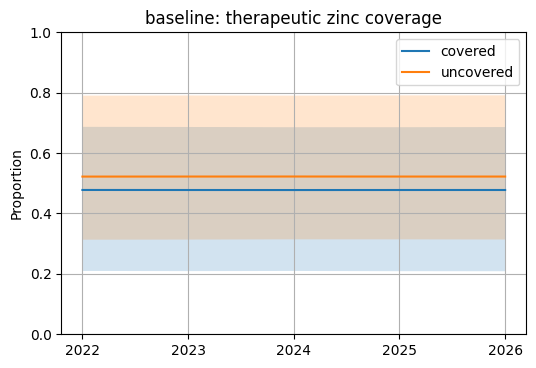

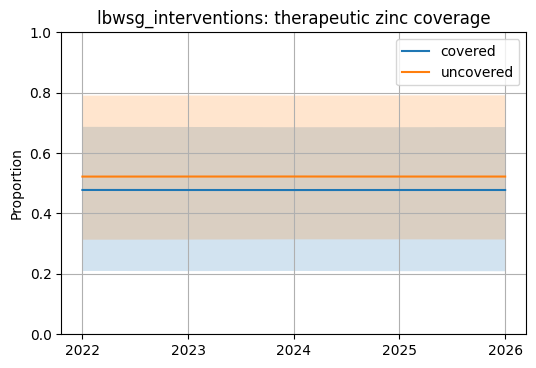

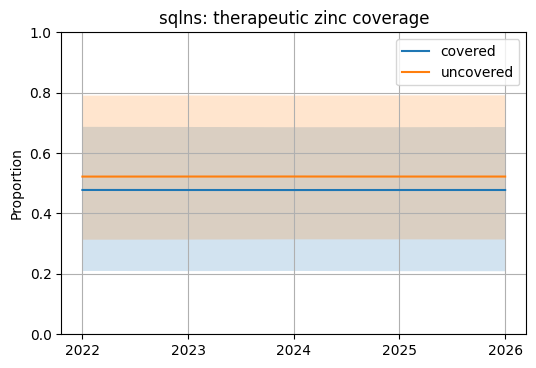

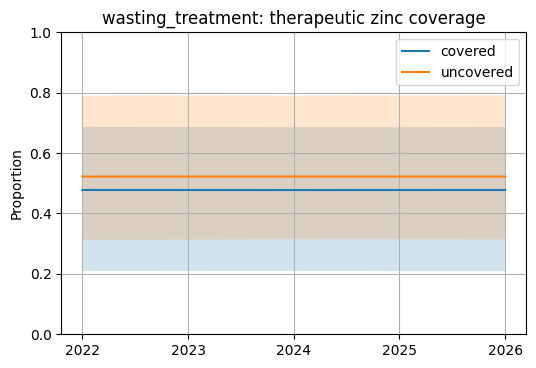

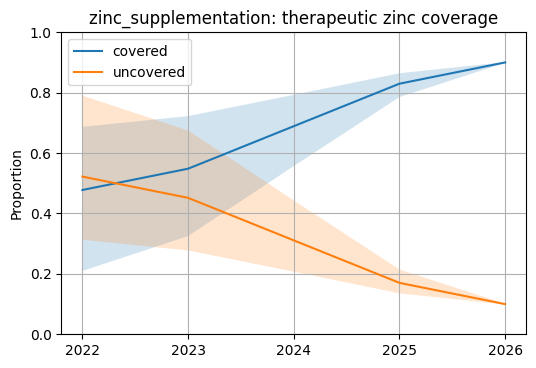

In [21]:
for scenario in ctzinc.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in ctzinc.reset_index().therapeutic_zinc.unique():
        p = ctzinc.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.therapeutic_zinc==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}: therapeutic zinc coverage')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# looks good!

# next let's check joint coverage of each intervention

In [24]:
# check to see that among those covered by preventative zinc, 100% are covered by thera. zinc

data = ddpt.loc[(ddpt.preventative_zinc=='covered')&(ddpt.scenario=='zinc_supplementation')]
data = data.groupby(['input_draw','therapeutic_zinc']).sum().reset_index()
assert np.all(data.loc[data.therapeutic_zinc=='uncovered']['value']==0)

# great!

# now look at impact of preventative zinc coverage on diarrheal disease incidence

In [32]:
ddtrans = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')

In [34]:
dd_incidence = ((ddtrans.loc[(ddtrans.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')
                            &(ddtrans.scenario=='zinc_supplementation')]
                .groupby(['age','sex','input_draw','scenario','preventative_zinc']).sum()[['value']])
                / (ddpt.loc[(ddpt.cause=='susceptible_to_diarrheal_diseases')
                           &(ddpt.scenario=='zinc_supplementation')]
                  .groupby(['age','sex','input_draw','scenario','preventative_zinc']).sum()[['value']])).reset_index()
                
dd_incidence_covered = dd_incidence.loc[dd_incidence.preventative_zinc=='covered'].set_index(['age','sex','input_draw'])[['value']]
dd_incidence_uncovered = dd_incidence.loc[dd_incidence.preventative_zinc=='uncovered'].set_index(['age','sex','input_draw'])[['value']]
dd_incidence_rr = dd_incidence_covered / dd_incidence_uncovered
dd_incidence_rr.groupby(['age','sex']).describe(percentiles=[0.025,0.975])

# validation target: 0.89 (95% CI: 0.82, 0.97; lognormal distribution of cuncertainty) 
# we're looking a bit optimistic in the effect

value                                          \
                       count      mean       std       min      2.5%   
age             sex                                                    
1-5_months      female  12.0  0.877181  0.040034  0.802947  0.809001   
                male    12.0  0.876523  0.036203  0.805987  0.810689   
12_to_23_months female  12.0  0.868420  0.039169  0.802178  0.805020   
                male    12.0  0.859236  0.038290  0.801290  0.801610   
2_to_4          female  12.0  0.862311  0.036294  0.800993  0.803805   
                male    12.0  0.860528  0.039823  0.797308  0.799478   
6-11_months     female  12.0  0.868492  0.042829  0.797485  0.800131   
                male    12.0  0.864273  0.040975  0.797734  0.799616   
early_neonatal  female  12.0  0.883713  0.063005  0.761177  0.772132   
                male    12.0  0.859446  0.036811  0.780441  0.789011   
late_neonatal   female  12.0  0.869741  0.032990  0.820544  0.825228   
                male    12.0  0.883261  0.045578  0.773020  0.793479   

                                                      
                             50%     97.5%       max  
age             sex                                   
1-5_months      female  0.882763  0.932895  0.935145  
                male    0.886696  0.917617  0.922653  
12_to_23_months female  0.877431  0.913434  0.915927  
                male    0.873301  0.908214  0.910228  
2_to_4          female  0.872324  0.902708  0.903243  
                male    0.870626  0.913513  0.914570  
6-11_months     female  0.875795  0.923629  0.925563  
                male    0.872939  0.917408  0.919948  
early_neonatal  female  0.902374  0.967308  0.979474  
                male    0.861682  0.910091  0.914473  
late_neonatal   female  0.865461  0.924061  0.931310  
                male    0.886802  0.940327  0.943441

# now effect of therapeutic zinc on diarrheal diseases remission

In [47]:
dd_remission = ((ddtrans.loc[(ddtrans.measure=='diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count')
                            &(ddtrans.scenario=='zinc_supplementation')]
                .groupby(['age','sex','input_draw','scenario','therapeutic_zinc']).sum()[['value']])
                / (ddpt.loc[(ddpt.cause=='diarrheal_diseases')
                           &(ddpt.scenario=='zinc_supplementation')]
                  .groupby(['age','sex','input_draw','scenario','therapeutic_zinc']).sum()[['value']]))#.reset_index()
dd_duration = (365/dd_remission).reset_index()           
dd_duration.head()

,age,sex,input_draw,scenario,therapeutic_zinc,value
0,1-5_months,female,29,zinc_supplementation,covered,4.164081
1,1-5_months,female,29,zinc_supplementation,uncovered,4.709906
2,1-5_months,female,223,zinc_supplementation,covered,4.326982
3,1-5_months,female,223,zinc_supplementation,uncovered,4.834376
4,1-5_months,female,232,zinc_supplementation,covered,4.479273


In [52]:
dd_duration_covered = dd_duration.loc[dd_duration.therapeutic_zinc=='covered'].set_index(['age','sex','input_draw'])[['value']]
dd_duration_uncovered = dd_duration.loc[dd_duration.therapeutic_zinc=='uncovered'].set_index(['age','sex','input_draw'])[['value']]
dd_duration_md = (dd_duration_uncovered - dd_duration_covered) * 24
dd_duration_md.groupby(['age','sex']).describe(percentiles=[0.025,0.975])

# validation target: -11.46 (95% CI: -19.72, -3.19; normal distribution of uncertainty)
# looks pretty good

value                                           \
                       count       mean       std       min      2.5%   
age             sex                                                     
1-5_months      female  12.0  11.015888  3.762301  5.950679  6.330823   
                male    12.0  11.743160  3.666556  5.309599  6.144272   
12_to_23_months female  12.0  11.356669  3.453636  7.609448  7.848431   
                male    12.0  11.286931  3.428616  6.027862  6.633993   
2_to_4          female  12.0  11.346517  3.755131  5.523718  5.984330   
                male    12.0  11.371021  3.672663  5.803182  6.324029   
6-11_months     female  12.0  11.139685  4.146063  4.219106  5.131818   
                male    12.0  11.691164  3.676848  7.193027  7.399685   
early_neonatal  female  12.0   9.039506  6.057398  1.471588  1.603492   
                male    12.0   9.545520  8.468095 -2.731339 -1.748266   
late_neonatal   female  12.0  10.559367  4.444582  2.270150  2.969986   
                male    12.0   9.489116  3.325278  5.558486  5.711379   

                                                         
                              50%      97.5%        max  
age             sex                                      
1-5_months      female  10.532968  18.367129  20.365075  
                male    11.501442  18.757979  20.614772  
12_to_23_months female  10.767047  18.784337  20.867719  
                male    11.166430  17.606288  18.943685  
2_to_4          female  11.013490  18.521829  20.272646  
                male    11.328536  18.101796  19.815449  
6-11_months     female  10.709009  19.392283  21.207416  
                male    12.118169  18.590966  20.364084  
early_neonatal  female   6.976055  18.971090  19.180994  
                male     8.177379  25.418348  29.048144  
late_neonatal   female  11.383452  17.547117  17.887407  
                male     8.703007  16.578808  18.016196